## Data Science Pipline Tutorial 

In [2]:
import pandas as pd 
import seaborn 
import matplotlib.pyplot as plt 
import numpy as np 
import statsmodels.api as sm 
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics
import sklearn.linear_model 


In [3]:
#data scraping 

data = pd.read_csv('owid-covid-data.csv')
data.head() 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [4]:

# deleting references to world data (wrl)
data = data[data.iso_code != 'OWID_WRL']

# # deleting references to Africa  (afr)
data = data[data.iso_code != 'OWID_AFR']

# # deleting references to Asia (asi)
data = data[data.iso_code != 'OWID_ASI']

# # deleting references to Europe and EU (EUR and EUN)
data = data[data.iso_code != 'OWID_EUR']
data = data[data.iso_code != 'OWID_EUN']

# # deleting references to North America (nam)
data = data[data.iso_code != 'OWID_NAM']

# # deleting references to Oceania (oce)
data = data[data.iso_code != 'OWID_OCE']

# # deleting references to South America (sam)  
data = data[data.iso_code != 'OWID_SAM']

data = data.sort_values(by=['population'] , ascending = False) 

# remove data columns that will not be used
data = data.drop(columns=['reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 
                         'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 
                         'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 
                         'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 
                         'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 
                         'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 
                         'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 
                         'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 
                         'stringency_index', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 
                         'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 
                         'female_smokers', 'male_smokers', 'hospital_beds_per_thousand', 
                         'life_expectancy', 'human_development_index', 'handwashing_facilities'])

data = data.drop(columns=['new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 
                         'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 
                         'new_deaths_smoothed_per_million'])


# getting the data for the latest date available (5/3/2021)
top_50 = data[data.date == '2021-05-03']
top_50 = top_50.head(50)

# create new columns for the averages of new deaths and new cases
# iter through rows of top_50 using the location to get the mean of all new cases/new deaths from that location
avg_new_cases = []
for index, row in top_50.iterrows():
    avg_new_cases.append(data[data.location == row['location']]['new_cases'].mean())
    
avg_new_deaths = []
for index, row in top_50.iterrows():
    avg_new_deaths.append(data[data.location == row['location']]['new_deaths'].mean())
    
# add new columns to top_50
top_50['avg_new_cases'] = avg_new_cases
top_50['avg_new_deaths'] = avg_new_deaths

# remove new cases and new deaths columns as the are only for may 3
top_50= top_50.drop(columns=['new_deaths', 'new_cases'])
# remove date because data spans more than just this date
top_50 = top_50.drop(columns=['date'])


top_50

,iso_code,continent,location,total_cases,total_deaths,population,avg_new_cases,avg_new_deaths
16713,CHN,Asia,China,102549.0,4846.0,1.439324e+09,218.417559,10.340471
35734,IND,Asia,India,20282833.0,222408.0,1.380004e+09,44093.115217,530.806683
81797,USA,North America,United States,32472201.0,577566.0,3.310026e+08,69533.618844,1343.176744
36162,IDN,Asia,Indonesia,1682004.0,45949.0,2.735236e+08,3929.915888,109.663484
59235,PAK,Asia,Pakistan,837523.0,18310.0,2.208923e+08,1929.776498,44.441748
11434,BRA,South America,Brazil,14779529.0,408622.0,2.125594e+08,34132.861432,989.399516
56466,NGA,Africa,Nigeria,165199.0,2063.0,2.061396e+08,383.292343,5.068796
7106,BGD,Asia,Bangladesh,763682.0,11644.0,1.646894e+08,1809.672986,28.262136
64039,RUS,Europe,Russia,4776844.0,109341.0,1.459345e+08,10407.067538,266.036496
50338,MEX,North America,Mexico,2349900.0,217345.0,1.289328e+08,5452.204176,528.819951


Text(0, 0.5, 'total deaths')

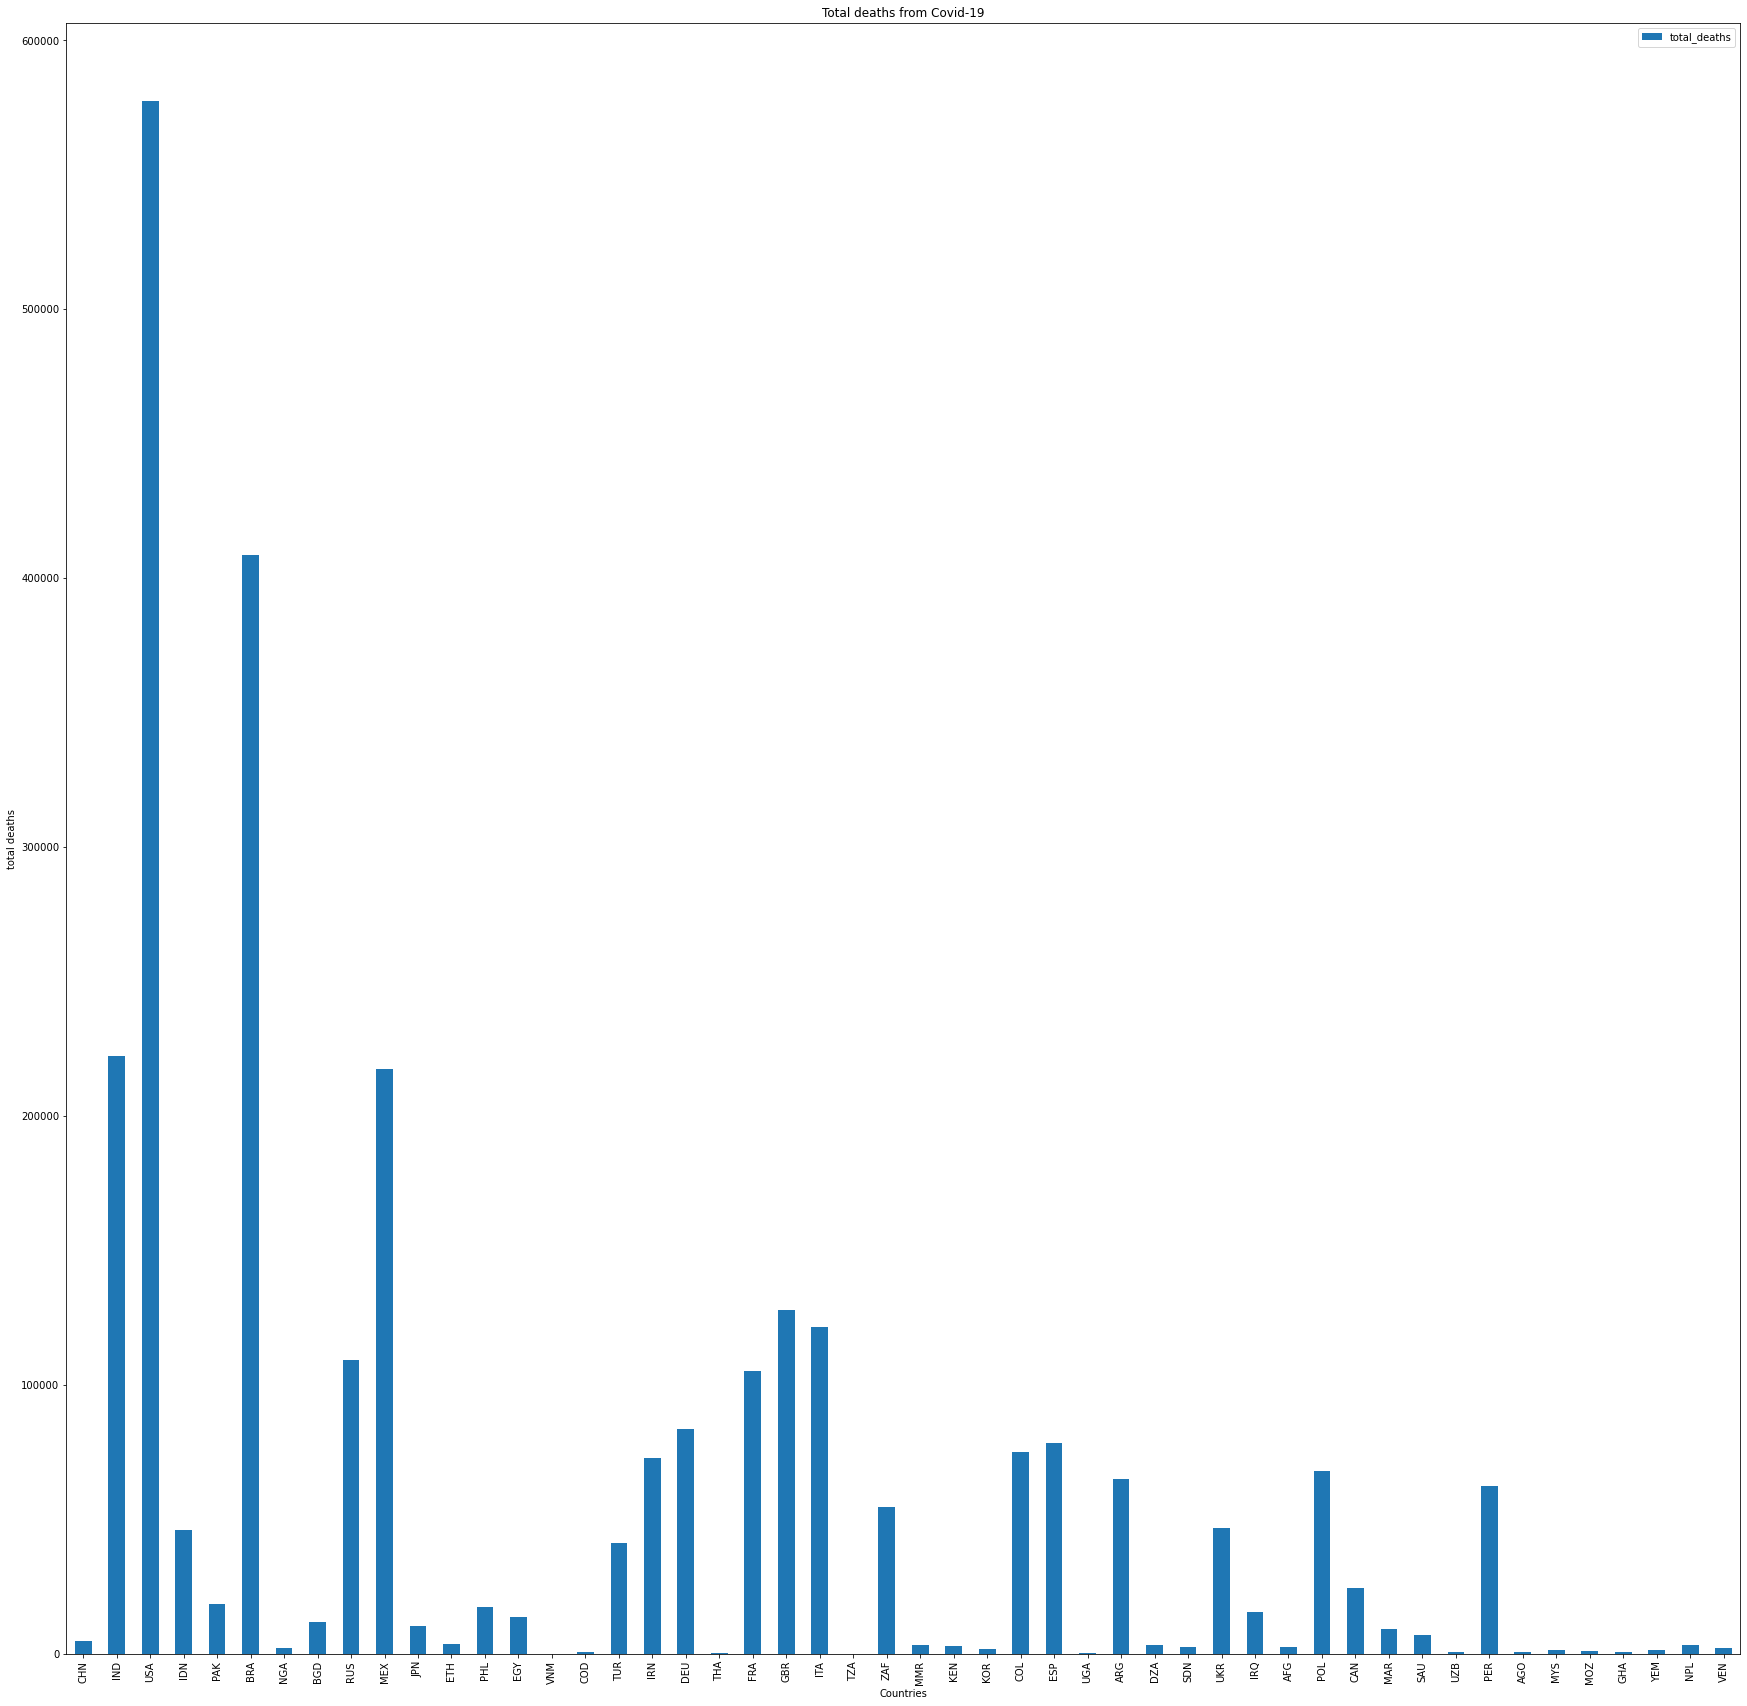

In [12]:
# Plotting the total deaths of the top 50 most populated countries from covid-19 

death = top_50.plot(x="iso_code", y="total_deaths", kind="bar", figsize = (30, 30), title = "Total deaths from Covid-19") 
death.set_xlabel("Countries")
death.set_ylabel("total deaths")

Text(0, 0.5, 'total cases')

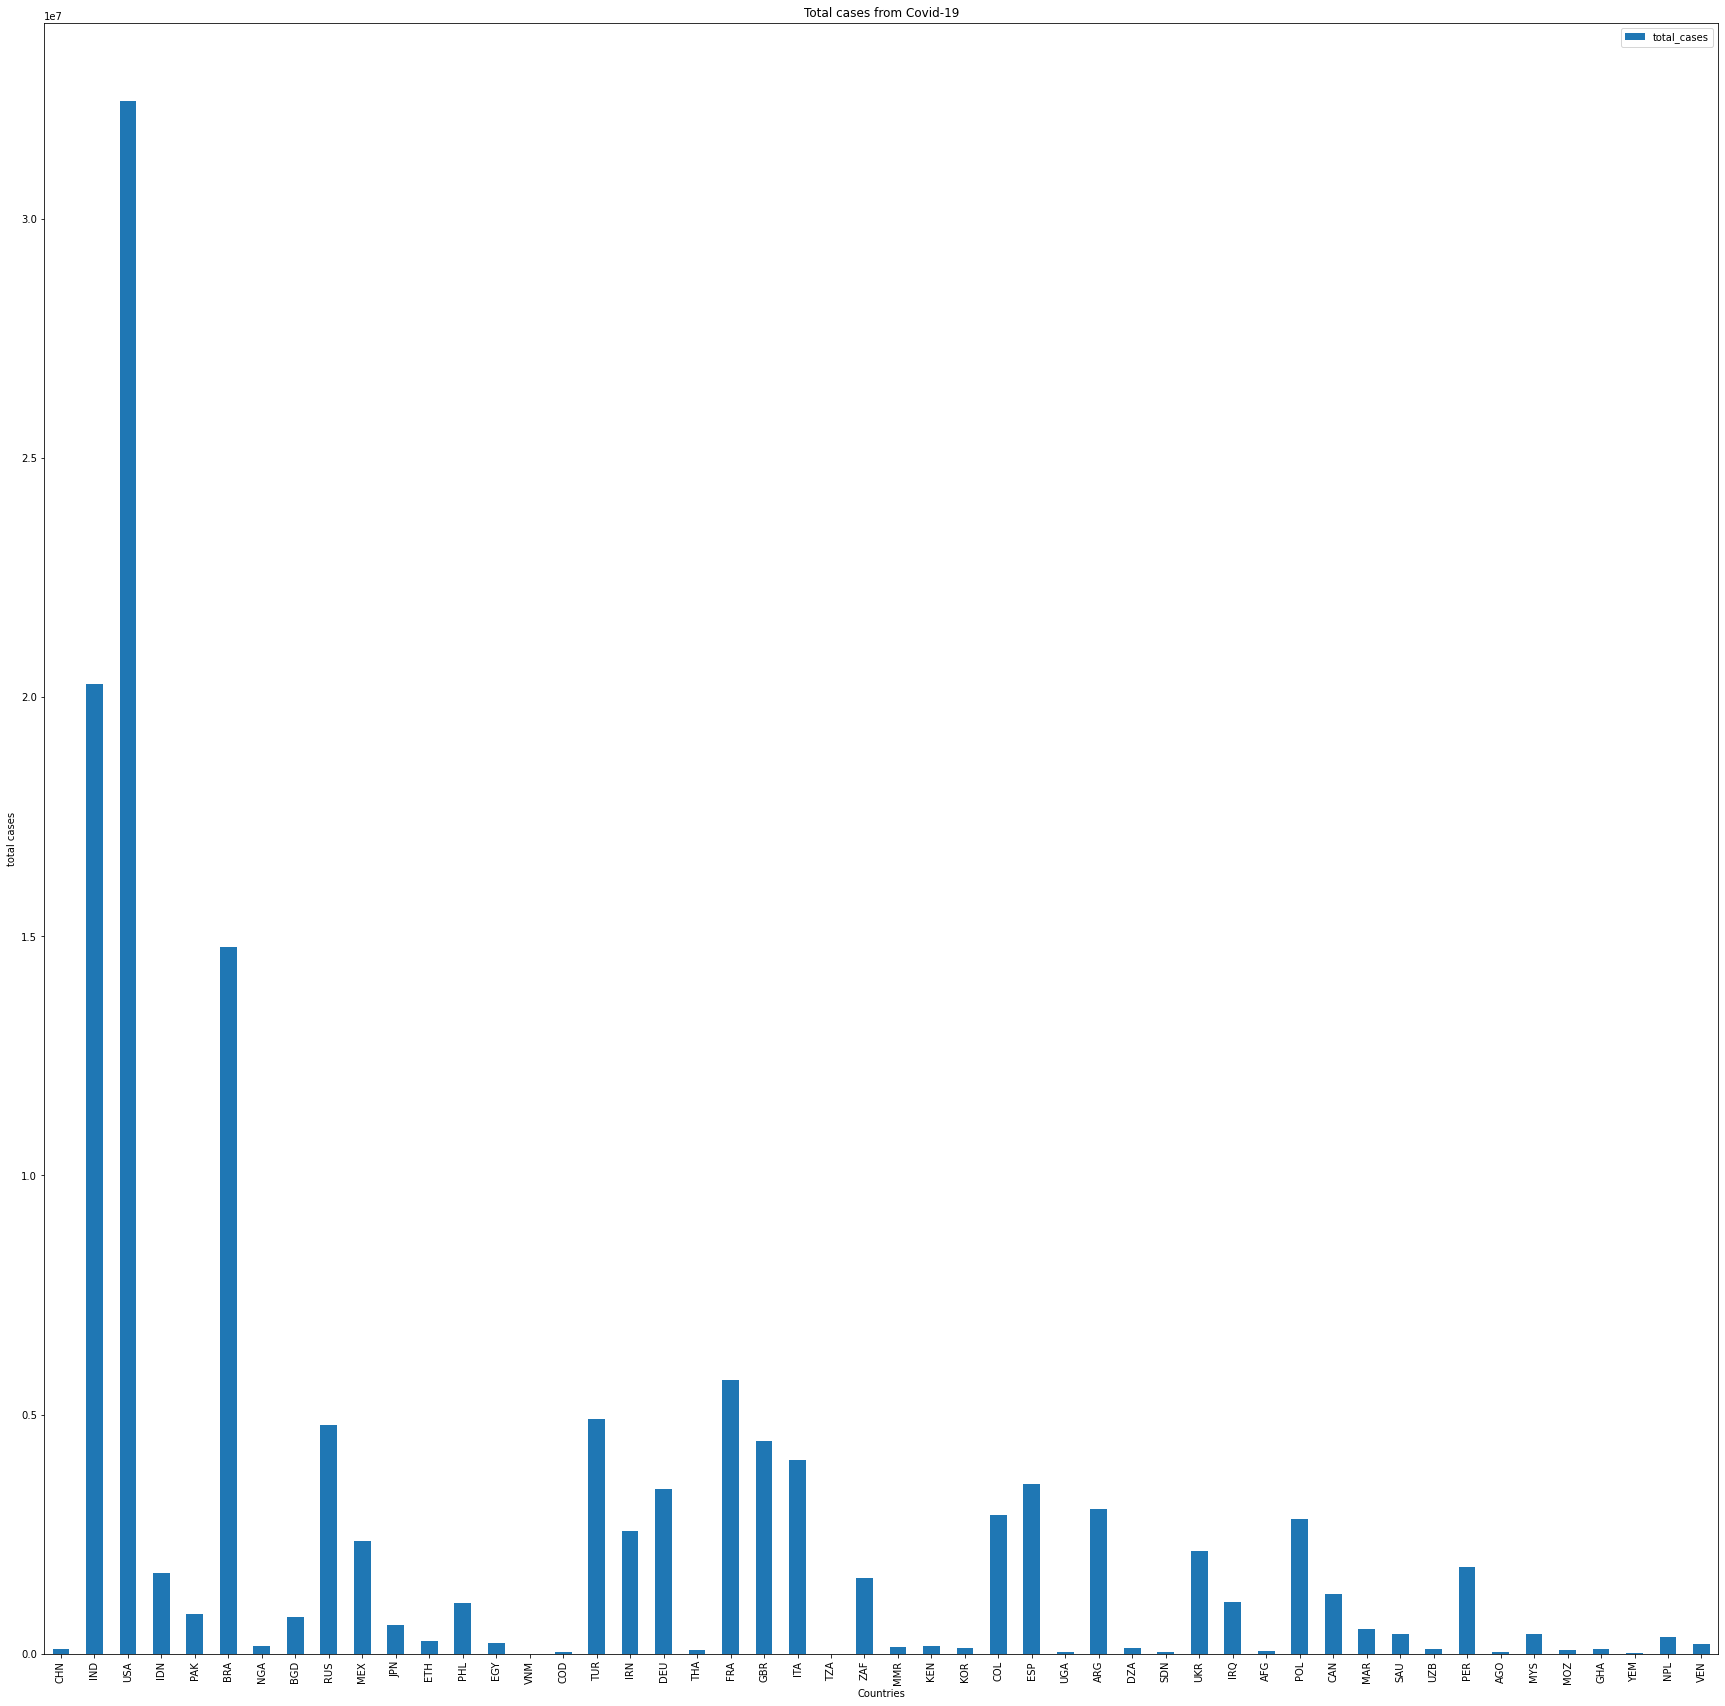

In [13]:
# Plotting the total deaths of the top 50 most populated countries from covid-19 


cases = top_50.plot(x="iso_code", y="total_cases", kind="bar", figsize = (30, 30), title = "Total cases from Covid-19") 
cases.set_xlabel("Countries")
cases.set_ylabel("total cases")

In [6]:
# adds the proportion of total cases and total deaths compared to the population of the country to top_50
proportion_of_total_cases = []
proportion_of_total_deaths = []
for index, row in top_50.iterrows():
    proportion_of_total_cases.append(row['total_cases'] / row['population'])
    proportion_of_total_deaths.append(row['total_deaths'] / row['population'])
    
top_50['total_cases / population'] = proportion_of_total_cases
top_50['total_deaths / population'] = proportion_of_total_deaths
top_50

,iso_code,continent,location,total_cases,total_deaths,population,avg_new_cases,avg_new_deaths,total_cases / population,total_deaths / population
16713,CHN,Asia,China,102549.0,4846.0,1.439324e+09,218.417559,10.340471,0.000071,3.366859e-06
35734,IND,Asia,India,20282833.0,222408.0,1.380004e+09,44093.115217,530.806683,0.014698,1.611647e-04
81797,USA,North America,United States,32472201.0,577566.0,3.310026e+08,69533.618844,1343.176744,0.098103,1.744898e-03
36162,IDN,Asia,Indonesia,1682004.0,45949.0,2.735236e+08,3929.915888,109.663484,0.006149,1.679891e-04
59235,PAK,Asia,Pakistan,837523.0,18310.0,2.208923e+08,1929.776498,44.441748,0.003792,8.289106e-05
11434,BRA,South America,Brazil,14779529.0,408622.0,2.125594e+08,34132.861432,989.399516,0.069531,1.922390e-03
56466,NGA,Africa,Nigeria,165199.0,2063.0,2.061396e+08,383.292343,5.068796,0.000801,1.000778e-05
7106,BGD,Asia,Bangladesh,763682.0,11644.0,1.646894e+08,1809.672986,28.262136,0.004637,7.070280e-05
64039,RUS,Europe,Russia,4776844.0,109341.0,1.459345e+08,10407.067538,266.036496,0.032733,7.492473e-04
50338,MEX,North America,Mexico,2349900.0,217345.0,1.289328e+08,5452.204176,528.819951,0.018226,1.685724e-03


Text(0, 0.5, 'total cases')

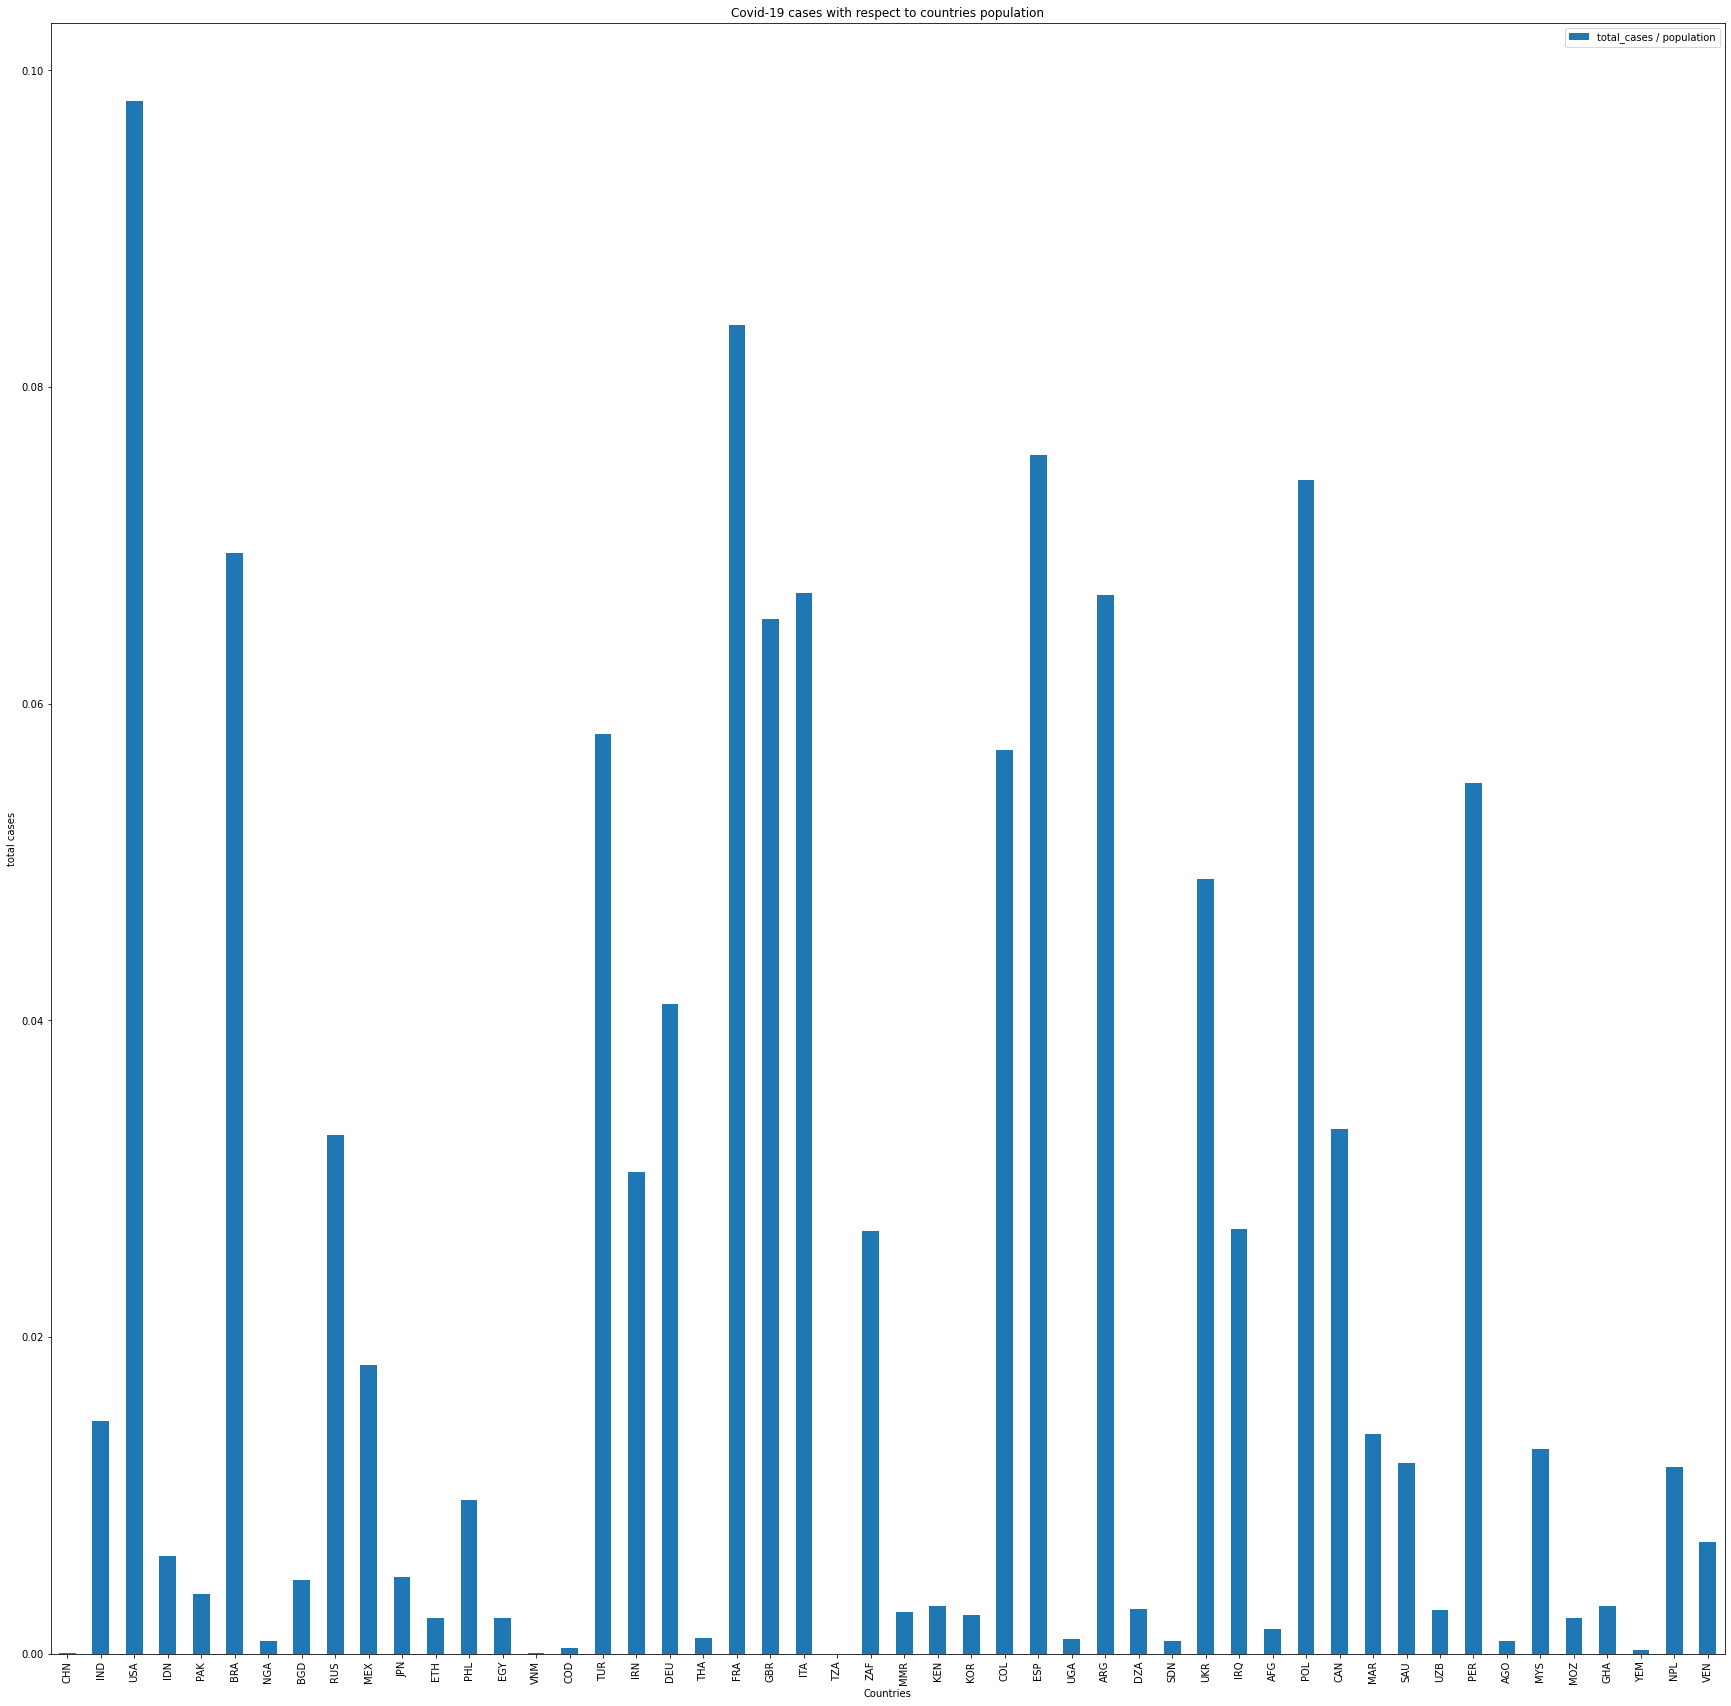

In [14]:
# Plotting the cases / population of the top 50 most populated countries from covid-19 

cases_ratio = top_50.plot(x="iso_code", y="total_cases / population", kind="bar", figsize = (30, 30), title = "Covid-19 cases with respect to countries population") 
cases_ratio.set_xlabel("Countries")
cases_ratio.set_ylabel("total cases")

Text(0, 0.5, 'total deaths')

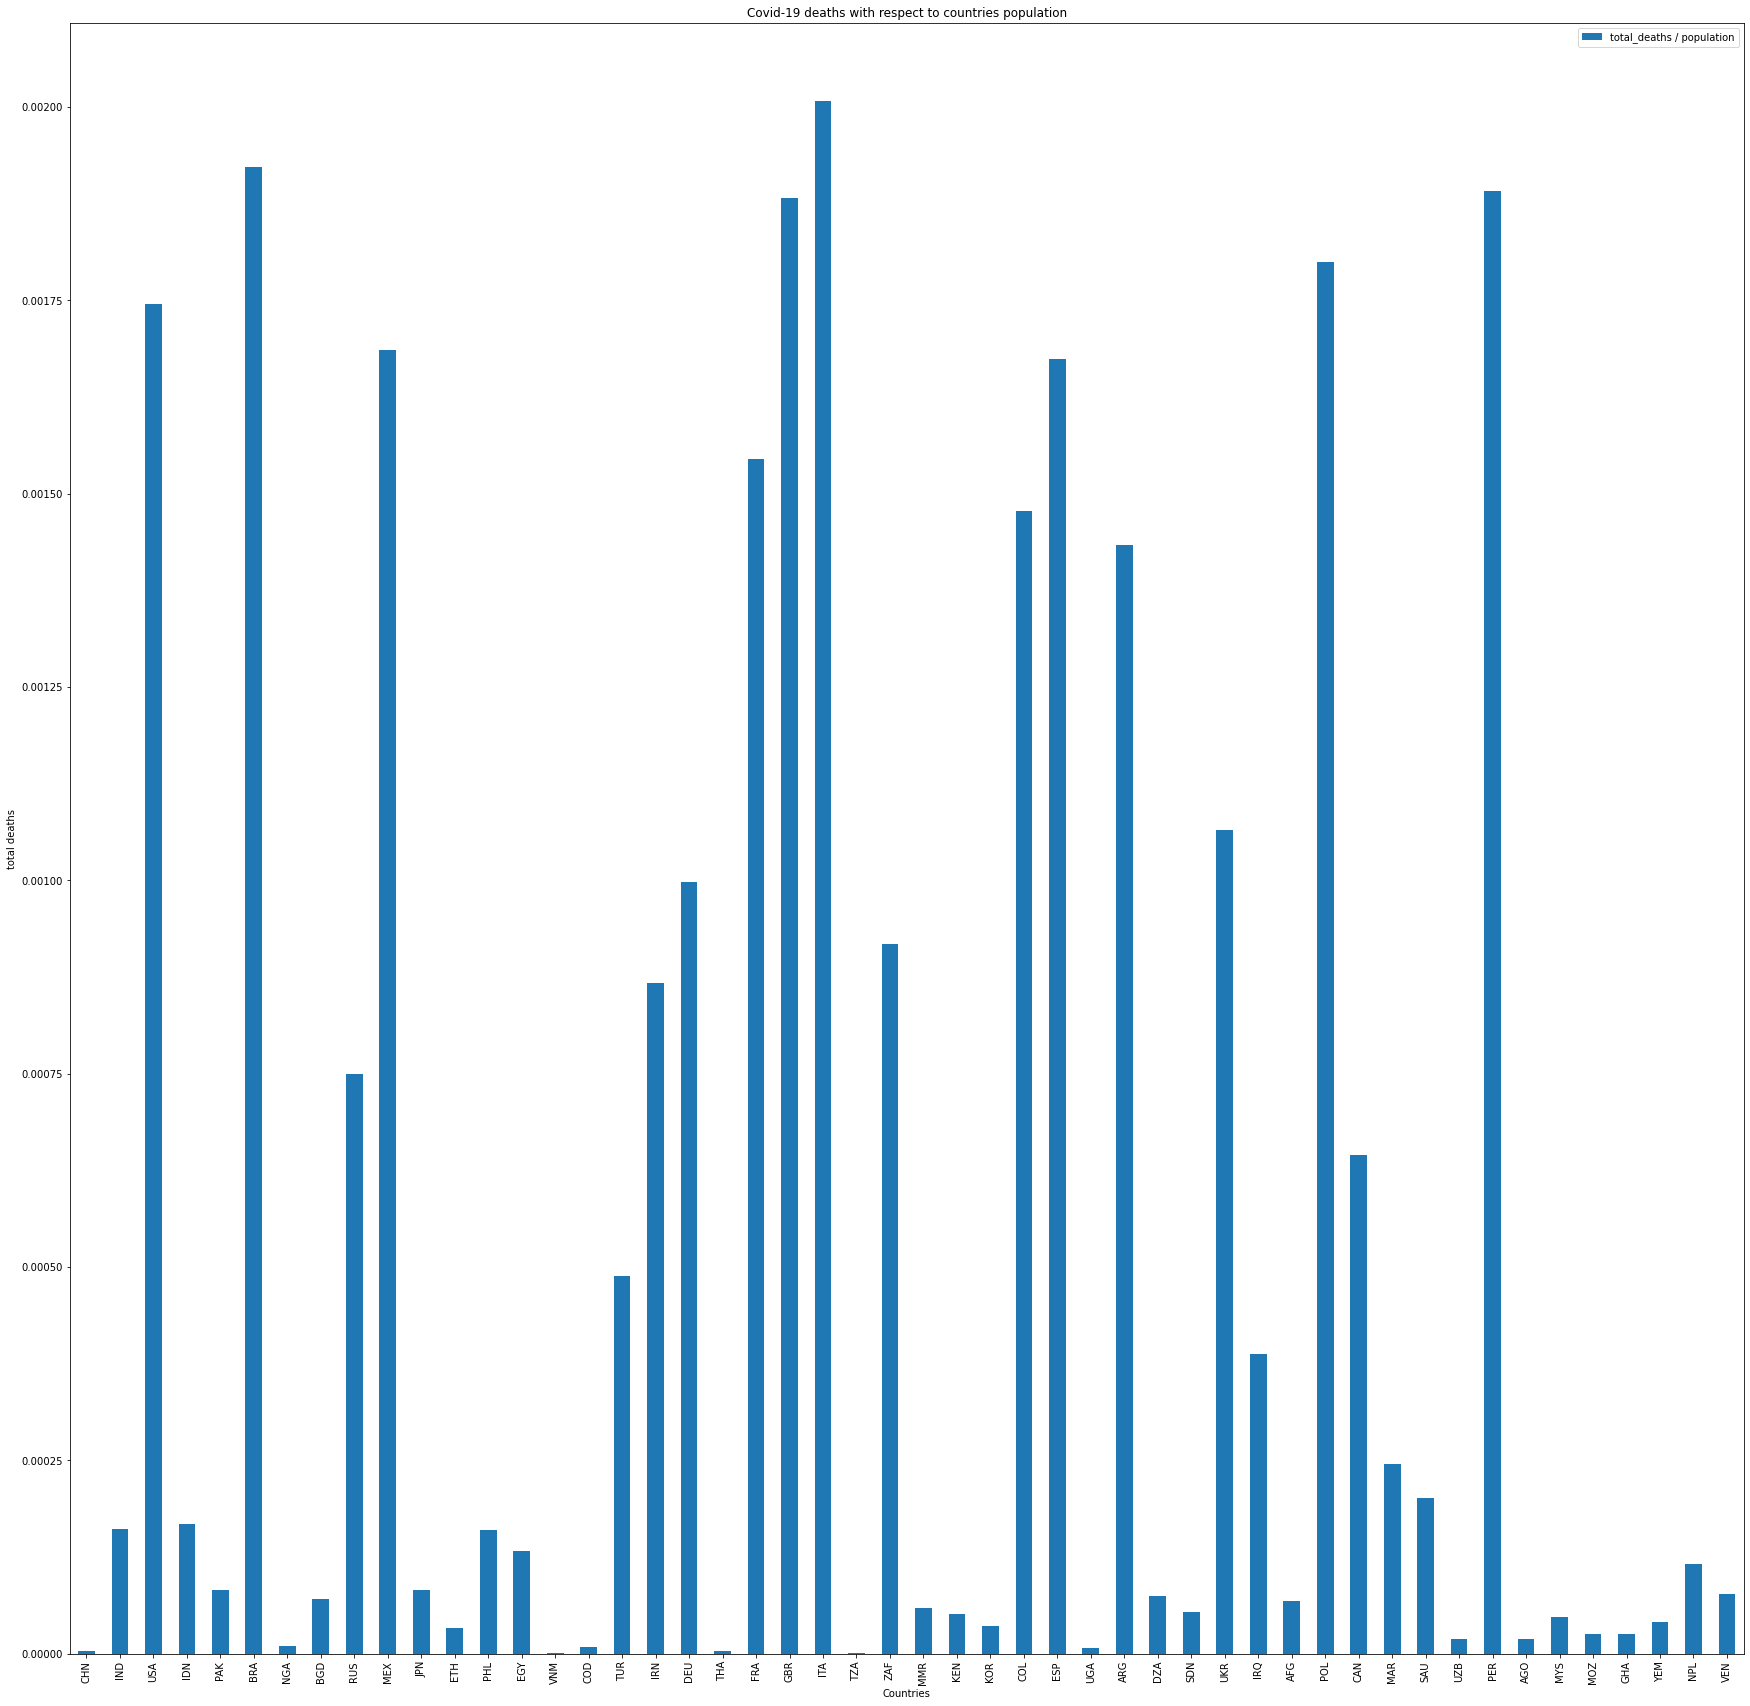

In [15]:
# Plotting the deaths / population of the top 50 most populated countries from covid-19

death_ratio = top_50.plot(x="iso_code", y="total_deaths / population", kind="bar", figsize = (30, 30), title = "Covid-19 deaths with respect to countries population") 
death_ratio.set_xlabel("Countries")
death_ratio.set_ylabel("total deaths")
